In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Circuit monitoring and optimization
- Robert Loredo (@robertloredo) 

In [2]:
# Import the Qiskit Jupyter tools 
from qiskit.tools import jupyter

# Initialize the job tracker to automatically track all jobs
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
#Disable the job watcher
%qiskit_disable_job_watcher

In [3]:
# Let's find the least busy quantum device 
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (2) and 
                                       not x.configuration().simulator 
                                       and x.status().operational==True))
print('Least busy device is: ', backend)

Least busy device is:  ibmq_valencia


In [7]:
# View backend details
backend

<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
# Obtain backend configuration details
backend.configuration().n_qubits

5

In [10]:
#Display the list of all available backends and provide a brief overview of each 
%qiskit_backend_overview

In [11]:
# Get the backend device: ibmq_santiago 
backend_santiago = provider.get_backend('ibmq_santiago')

# Launch backend viewer of ibmq_santiago
backend_santiago

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
# Get the backend device: ibmq_16_melbourne
backend_melbourne = provider.get_backend('ibmq_16_melbourne')

# Launch backend viewer of ibmq_16_melbourne
backend_melbourne

<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>

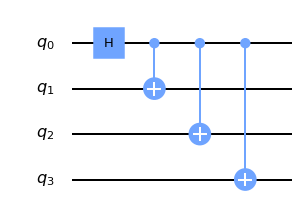

In [13]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.draw()

Depth: 10


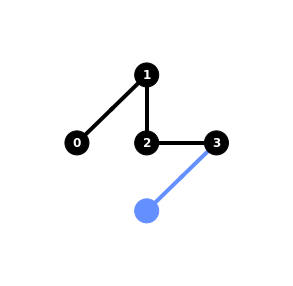

In [14]:
# Transpile the circuit with an optimization level = 0
qc_santiago_0 = transpile(qc, backend_santiago, 
seed_transpiler=10258, optimization_level=0)
# Print out the depth of the circuit
print('Depth:', qc_santiago_0.depth())
# Plot the resulting layout of the quantum circuit after Layout
plot_circuit_layout(qc_santiago_0, backend_santiago)

Depth: 10


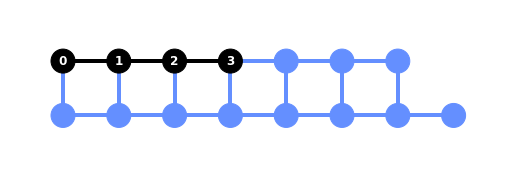

In [15]:
# View the transpiled circuit with an optimization level = 0
qc_melbourne_0 = transpile(qc, backend_melbourne, seed_transpiler=10258, optimization_level=0)
print('Depth:', qc_melbourne_0.depth())
plot_circuit_layout(qc_melbourne_0, backend_melbourne)

Depth: 11
Ops count:  OrderedDict([('cx', 10), ('u2', 7)])


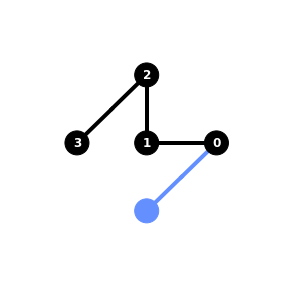

In [16]:
# Transpile the circuit with the optimization level = 3
qc_transpiled_santiago = transpile(qc, backend_santiago, optimization_level=3)
# Print the depth of the transpiled circuit
print('Depth:', qc_transpiled_santiago.depth())
# Print the number of operations of the transpiled circuit
print('Ops count: ', qc_transpiled_santiago.count_ops())
# Plot the layout mapping of the transpiled circuit
plot_circuit_layout(qc_transpiled_santiago, backend_santiago)

Depth: 4
Ops count:  OrderedDict([('cx', 3), ('u2', 1)])


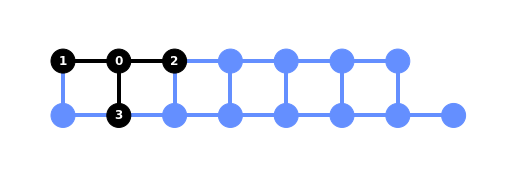

In [17]:
# Transpile the quantum circuit with the optimization level = 3
qc_transpiled_melbourne = transpile(qc, backend_melbourne, optimization_level=3)
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_melbourne.depth())
print('Ops count: ', qc_transpiled_melbourne.count_ops())
# Print the circuit layout
plot_circuit_layout(qc_transpiled_melbourne, backend_melbourne)

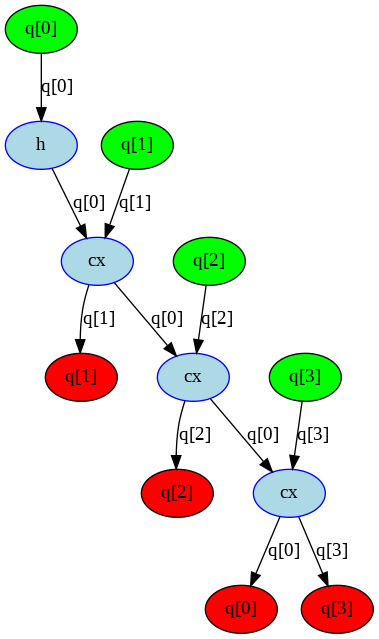

In [18]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.tools.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)
# Draw the DAG of the circuit
dag_drawer(dag)

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table